C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

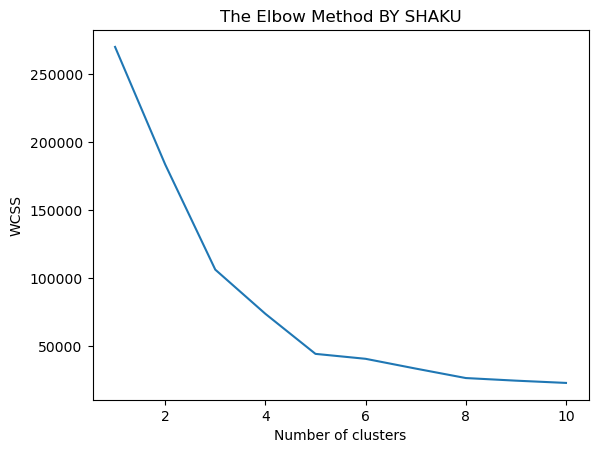

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Assuming you are working with the 'Mall_Customers.csv' dataset
df = pd.read_csv("Mall_Customers.csv")
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Select features for clustering
# Calculate WCSS for different numbers of clusters
wcss = []
for k in range(1, 11):
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(x)
    wcss.append(k_means.inertia_)
# Plot the results using the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method BY SHAKU')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:
import pandas as pd
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.cluster import KMeans

df = pd.read_csv("Mall_Customers.csv")
# Prepare the data for clustering
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
k_mean = KMeans(n_clusters=5, random_state=42)
y_mean = k_mean.fit_predict(x)
def show_entry_fields():
  p1 = int(e1.get())
  p2 = int(e2.get())  
  result = k_mean.predict([[p1, p2]])
  print("This customer belongs to cluster no:", result[0])

  cluster_info = {
      0: "customer with medium annual income & medium annual spending score",
      1: "customer with high annual income & low annual spending score",
      2: "customer with low annual income & low annual spending score",
      3: "customer with low annual income & high annual spending score",
      4: "customer with high annual income & high annual spending score"
  }
  for widget in master.grid_slaves():
    if int(widget.grid_info()["row"]) >= 4:  # Assuming info labels start from row 4
      widget.destroy()
  Label(master, text=cluster_info[result[0]]).grid(row=4)
master = Tk()
master.title("shaku Customer Segmentation using Machine Learning")
Label(master, text="SHAKU Customer Segmentation using Machine Learning", bg="Yellow", fg="black").grid(row=0, columnspan=2)
# Input labels and entrie
Label(master, text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)
e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
Button(master, text='Predict', command=show_entry_fields).grid(row=3)
figure3 = plt.Figure(figsize=(5, 4), dpi=100)
ax3 = figure3.add_subplot(111)
for i in range(5):  # Since n_clusters=5
  ax3.scatter(x.iloc[y_mean == i, 0], x.iloc[y_mean == i, 1], s=100, label=f'Cluster {i}')
ax3.set_xlabel('Annual Income (k$)')
ax3.set_ylabel('Spending Score (1-100)')
ax3.set_title('Annual Income vs Spending Score')
ax3.legend()
scatter3 = FigureCanvasTkAgg(figure3, master)
scatter3.get_tk_widget().grid(row=5, columnspan=2)
master.mainloop()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This customer belongs to cluster no: 3


In [16]:
import pandas as pd
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.cluster import KMeans

# Load the data
df = pd.read_csv("Placement.csv")
x = df[['cgpa', 'package']]

# Initialize KMeans with the desired number of clusters
k_mean = KMeans(n_clusters=5, random_state=42)
y_mean = k_mean.fit_predict(x)

# Function to handle the 'Predict' button click
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    result = k_mean.predict([[p1, p2]])
    print("This student belongs to cluster no:", result[0])
    
    cluster_info = {
        0: "students with medium CGPA and medium package",
        1: "students with high CGPA and low package",
        2: "students with low CGPA and low package",
        3: "students with low CGPA and high package",
        4: "students with high CGPA and high package"
    }
    
    # Clear previous labels if any
    for widget in master.grid_slaves():
        if int(widget.grid_info()["row"]) >= 4:  # Assuming info labels start from row 4
            widget.destroy()

    # Display the result label
    Label(master, text=cluster_info[result[0]]).grid(row=4)

# Initialize the main Tkinter window
master = Tk()
master.title("Student Placement Segmentation")

# Main title label
Label(master, text="Student Placement Segmentation using Machine Learning", bg="Yellow", fg="black").grid(row=0, columnspan=2)

# Input labels and entry fields
Label(master, text="CGPA").grid(row=1)
Label(master, text="Package").grid(row=2)
e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

# Predict button
Button(master, text='Predict', command=show_entry_fields).grid(row=3)

# Plotting the clusters
figure3 = plt.Figure(figsize=(5, 4), dpi=100)
ax3 = figure3.add_subplot(111)

# Plot the existing clusters
for i in range(5):  # Since n_clusters=5
    ax3.scatter(x.iloc[y_mean == i, 0], x.iloc[y_mean == i, 1], s=100, label=f'Cluster {i}')

# Set plot labels and title
ax3.set_xlabel('CGPA')
ax3.set_ylabel('Package')
ax3.set_title('CGPA vs Package')
ax3.legend()

# Display the figure in the Tkinter window
scatter3 = FigureCanvasTkAgg(figure3, master)
scatter3.get_tk_widget().grid(row=5, columnspan=2)

# Run the main Tkinter event loop
master.mainloop()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This student belongs to cluster no: 4
